In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

In [59]:
data =  pd.read_csv('conversion_data.csv')

In [60]:
data.head()

,country,age,new_user,source,total_pages_visited,converted
0,UK,25,1,Ads,1,0
1,US,23,1,Seo,5,0
2,US,28,1,Seo,4,0
3,China,39,1,Seo,5,0
4,US,30,1,Seo,6,0


In [61]:
data.dtypes

country                object
age                     int64
new_user                int64
source                 object
total_pages_visited     int64
converted               int64
dtype: object

In [62]:
data.describe()

,age,new_user,total_pages_visited,converted
count,316200.000000,316200.000000,316200.000000,316200.000000
mean,30.569858,0.685465,4.872966,0.032258
std,8.271802,0.464331,3.341104,0.176685
min,17.000000,0.000000,1.000000,0.000000
25%,24.000000,0.000000,2.000000,0.000000
50%,30.000000,1.000000,4.000000,0.000000
75%,36.000000,1.000000,7.000000,0.000000
max,123.000000,1.000000,29.000000,1.000000


In [63]:
data[data.age>=100]

,country,age,new_user,source,total_pages_visited,converted
90928,Germany,123,0,Seo,15,1
295581,UK,111,0,Ads,10,1


In [64]:
## removing the outliers in age
data = data[data.age<=100]

([<matplotlib.axis.YTick at 0x23249e30278>,
 <a list of 4 Text yticklabel objects>)

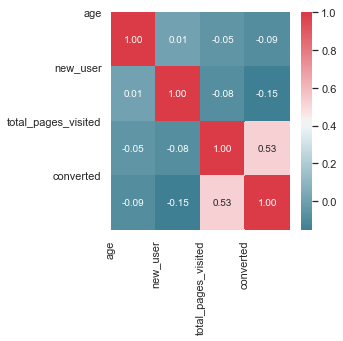

In [65]:
fig, ax = plt.subplots(figsize=(4, 4))
corr = data.corr()
colormap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, cmap=colormap, annot=True, fmt=".2f")
plt.xticks(range(len(corr.columns)), corr.columns)
plt.yticks(range(len(corr.columns)), corr.columns)

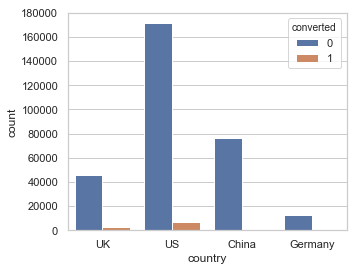

In [66]:
plt.figure(figsize = (5,4))
sns.set(style = 'whitegrid')
sns.countplot(data.country, hue = data.converted )

In [67]:
cntrygrp = data[['country','converted']].groupby('country').mean()
cntrygrp

,converted
country,
China,0.001332
Germany,0.062428
UK,0.052612
US,0.037801


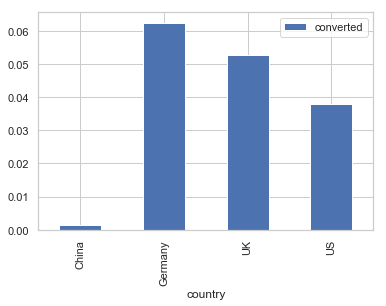

In [68]:
cntrygrp.plot(kind = 'bar')

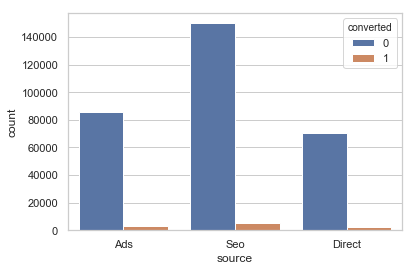

In [69]:
sns.countplot(data.source, hue = data.converted )

In [70]:
srcgrp = data[['source','converted']].groupby('source').mean()
srcgrp

,converted
source,
Ads,0.034472
Direct,0.028169
Seo,0.032888


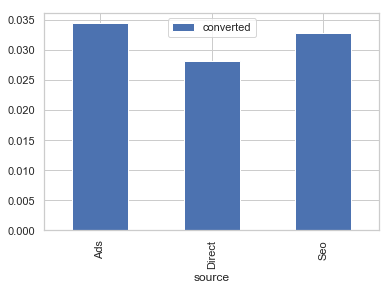

In [71]:
srcgrp.plot(kind='bar')

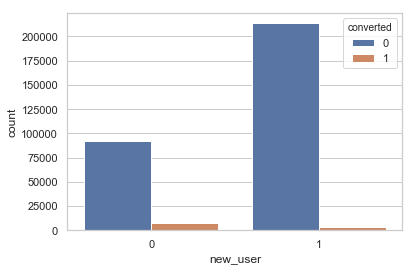

In [72]:
sns.countplot(data.new_user, hue = data.converted )

In [73]:
pd.crosstab(data.converted, data.new_user,
            margins = True,normalize=True)

new_user,0,1,All
converted,,,
0,0.291890,0.675858,0.967748
1,0.022641,0.009611,0.032252
All,0.314531,0.685469,1.000000


In [74]:
usergrp = data[['new_user','converted']].groupby('new_user').mean()
usergrp

,converted
new_user,
0,0.071983
1,0.014021


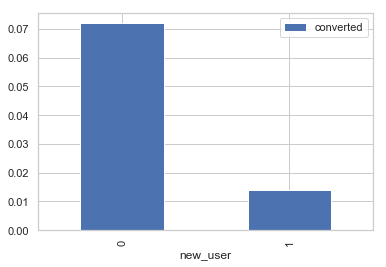

In [75]:
usergrp.plot(kind = 'bar' )

C:\Users\ganga\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


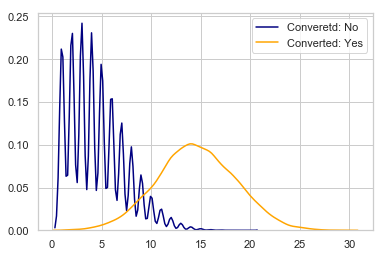

In [76]:
#sns.kdeplot(data.total_pages_visited, hue = data.converted )
ax0 = sns.kdeplot(data[data['converted'] == 0]['total_pages_visited'], color= 'navy', label= 'Converetd: No')
ax1 = sns.kdeplot(data[data['converted'] == 1]['total_pages_visited'], color= 'orange', label= 'Converted: Yes')

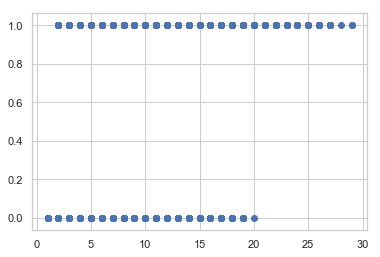

In [77]:
plt.scatter(data.total_pages_visited,data.converted)

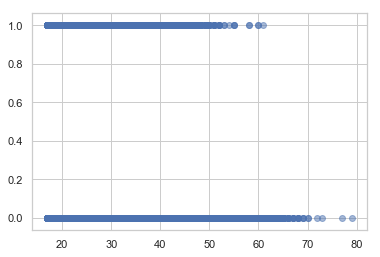

In [78]:
plt.scatter(data.age,data.converted,alpha = 0.5)

In [79]:
X = data.loc[:,('country', 'age', 'new_user', 'source', 'total_pages_visited')]
X = pd.get_dummies(X)# OHE those categorical features

In [80]:
X.head()

,age,new_user,total_pages_visited,country_China,country_Germany,country_UK,country_US,source_Ads,source_Direct,source_Seo
0,25,1,1,0,0,1,0,1,0,0
1,23,1,5,0,0,0,1,0,0,1
2,28,1,4,0,0,0,1,0,0,1
3,39,1,5,1,0,0,0,0,0,1
4,30,1,6,0,0,0,1,0,0,1


In [81]:
Y = data.converted

In [82]:
from sklearn.model_selection import train_test_split
#from sklearn.cross_validation import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,Y,random_state = 0)

In [83]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import GridSearchCV,cross_val_score
from sklearn.metrics import classification_report,confusion_matrix

### Logistic Regression

In [84]:
lrcv = LogisticRegressionCV(Cs = np.logspace(-3,3,7),
                            dual=False,
                            scoring='roc_auc',
                            max_iter=1000,
                            n_jobs=-1,
                            verbose=1)
lrcv.fit(x_train,y_train)

C:\Users\ganga\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   16.4s finished


LogisticRegressionCV(Cs=array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
           class_weight=None, cv='warn', dual=False, fit_intercept=True,
           intercept_scaling=1.0, max_iter=1000, multi_class='warn',
           n_jobs=-1, penalty='l2', random_state=None, refit=True,
           scoring='roc_auc', solver='lbfgs', tol=0.0001, verbose=1)

In [85]:
lrcv.scores_

{1: array([[0.97990039, 0.98294451, 0.98355344, 0.98357281, 0.98357377,
         0.98357377, 0.98357377],
        [0.9835209 , 0.98646098, 0.98731772, 0.98744482, 0.98745689,
         0.98745689, 0.98745689],
        [0.98432559, 0.98671263, 0.987143  , 0.98712733, 0.98711927,
         0.98711927, 0.98711927]])}

In [86]:
lrcv.C_

array([10.])

In [87]:
lrcv.score(x_train,y_train)

C:\Users\ganga\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1920: ChangedBehaviorWarning: The long-standing behavior to use the accuracy score has changed. The scoring parameter is now used. This warning will disappear in version 0.22.
  ChangedBehaviorWarning)


0.9860832576713695

In [88]:
print("Test Score",lrcv.score(x_test,y_test))
print(1 - y_test.mean())

Test Score 0.9859120778166206
0.9680834914611006


C:\Users\ganga\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1920: ChangedBehaviorWarning: The long-standing behavior to use the accuracy score has changed. The scoring parameter is now used. This warning will disappear in version 0.22.
  ChangedBehaviorWarning)


In [89]:
ytest_predict = lrcv.predict(x_test)
print(classification_report(y_true=y_test,y_pred=ytest_predict))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99     76527
           1       0.85      0.68      0.76      2523

   micro avg       0.99      0.99      0.99     79050
   macro avg       0.92      0.84      0.88     79050
weighted avg       0.99      0.99      0.99     79050



since this is an imbalanced classification problem, if we group every record as 'NOT converted', we can still get 96.73 accuracy (1-y_test.mean()). since our LR model produces an accurancy as 98.57% on test dataset, which indicates it is a model which makes sense.

In [90]:
feat_importances = pd.DataFrame({"name":x_train.columns,"coef":lrcv.coef_[0]})
feat_importances = feat_importances[['name','coef']]# reorder the columns
feat_importances['importances'] = np.abs( feat_importances['coef'] )
feat_importances.sort_values(by="importances",inplace=True,ascending=False)
feat_importances

,name,coef,importances
3,country_China,-2.677944,2.677944
1,new_user,-1.694587,1.694587
4,country_Germany,1.114540,1.114540
5,country_UK,0.892171,0.892171
2,total_pages_visited,0.759347,0.759347
6,country_US,0.516115,0.516115
8,source_Direct,-0.176820,0.176820
0,age,-0.075832,0.075832
7,source_Ads,0.027325,0.027325
9,source_Seo,-0.005623,0.005623


Interpretation of Coefficients:

- conversion among China users are very bad. from inspection of data, we observe that there are lot of users from China, but their conversion rate is very low. There is a huge opportunity if we target Chinese users and improve their conversion rate. 
- conversion from Germany is good. but from inspection, we observe that there aren't a many users from Germany. We can target to improve customer engagement of Germany users
- age is a negative coefficient. Older the user, less likely he/she will convert. 
- total_pages_visited has a positive coefficient. Longer the user engages with web page, more likely he/she will convert.

### Random Forest

In [91]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
rf = RandomForestClassifier(random_state = 0)
rf.fit(x_train,y_train)
print("Accuracy Score train:",rf.score(x_train, y_train))
print("Accuracy Score test:",rf.score(x_test, y_test))
rf_pred = rf.predict(x_test)


C:\Users\ganga\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Accuracy Score train: 0.988091824514649
Accuracy Score test: 0.9847311827956989


In [92]:
rf_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [93]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,rf_pred)


array([[76148,   379],
       [  828,  1695]], dtype=int64)

In [94]:
feat =   x_train.columns
featImp = rf.feature_importances_
featImp_df = pd.DataFrame({"Feature" : feat , "Importance" : featImp })
featImp_df.sort_values(by="Importance",inplace=True,ascending=False)
featImp_df

,Feature,Importance
2,total_pages_visited,0.822201
0,age,0.105529
1,new_user,0.036226
3,country_China,0.019001
6,country_US,0.004413
5,country_UK,0.003528
9,source_Seo,0.002507
4,country_Germany,0.002237
7,source_Ads,0.002187
8,source_Direct,0.002173


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

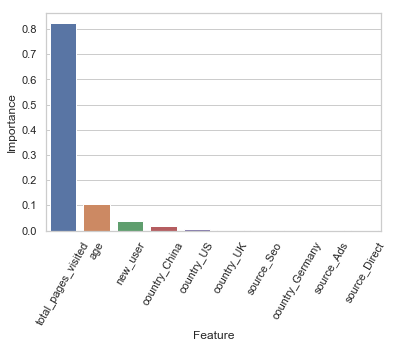

In [95]:
sns.barplot(featImp_df.Feature , featImp_df.Importance)
plt.xticks(rotation = 60)

### K Nearest Neighbors

In [96]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
print("Training Score: ",knn.score(x_train,y_train))
predictions = knn.predict(x_test)
acc_cv = cross_val_score(knn,x_test, y_test, cv=10,n_jobs =-1)
print("Test score: ",acc_cv.mean()) 

Training Score:  0.9866707709953279
Test score:  0.9843137557459333


In [97]:
print(classification_report(y_true=y_test,y_pred=predictions))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99     76527
           1       0.82      0.67      0.74      2523

   micro avg       0.98      0.98      0.98     79050
   macro avg       0.90      0.83      0.87     79050
weighted avg       0.98      0.98      0.98     79050

